<a href="https://colab.research.google.com/github/SilvioSodre13/Projetos-DataCamp/blob/maim/The_Android_App_Market_on_Google_Play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#1. Google Play Store apps and reviews

import pandas as pd
apps_with_duplicates = pd.read_csv('/content/apps.csv')
apps = apps_with_duplicates.drop_duplicates()
display(apps.sample (n = 5))

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5680,6711,B. R. Ambedkar Jayanti SMS,PERSONALIZATION,NaN,0,3.0,500+,Free,0,Everyone,Personalization,"March 19, 2018",1.2,4.0.3 and up
8648,9791,ES Material Theme for Pro,PRODUCTIVITY,4.2,14428,1.2,"1,000,000+",Free,0,Everyone,Productivity,"December 3, 2015",2.0.3,2.2 and up
9136,10307,FD VR - Virtual Photo Gallery,FAMILY,3.5,179,7.4,"10,000+",Free,0,Everyone,Entertainment,"November 30, 2016",3.6.1,4.4 and up
3811,4737,Zaatar w Zeit,FOOD_AND_DRINK,4.4,205,33.0,"50,000+",Free,0,Everyone,Food & Drink,"July 1, 2018",2.2.2,4.4 and up
8390,9516,Sai Baba - Sabka Malik Ek,PRODUCTIVITY,4.9,42,38.0,"1,000+",Free,0,Everyone,Productivity,"May 26, 2018",1.4,4.0 and up


In [39]:
#2. Data cleaning

chars_to_remove = ['+',',','$']
cols_to_clean = ['Installs','Price']
for col in cols_to_clean :
    for char in chars_to_remove :
        apps[col]=apps[col].apply(lambda x:x.replace(char,''))
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB


In [40]:
#3. Correcting data type
apps['Installs'] = apps['Installs'].astype(float)
apps['Price']= apps['Price'].astype(float)
apps.dtypes
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


In [41]:
#4. Exploring app categories
num_categories = len(apps['Category'].unique())
num_apps_in_category = apps['Category'].value_counts()
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)


In [42]:
#5. Distribution of app ratings
avg_app_rating = apps['Rating'].mean()

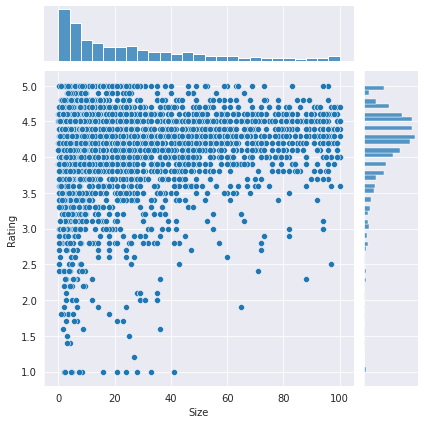

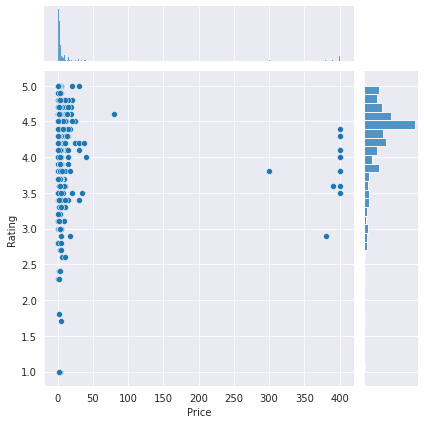

In [43]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


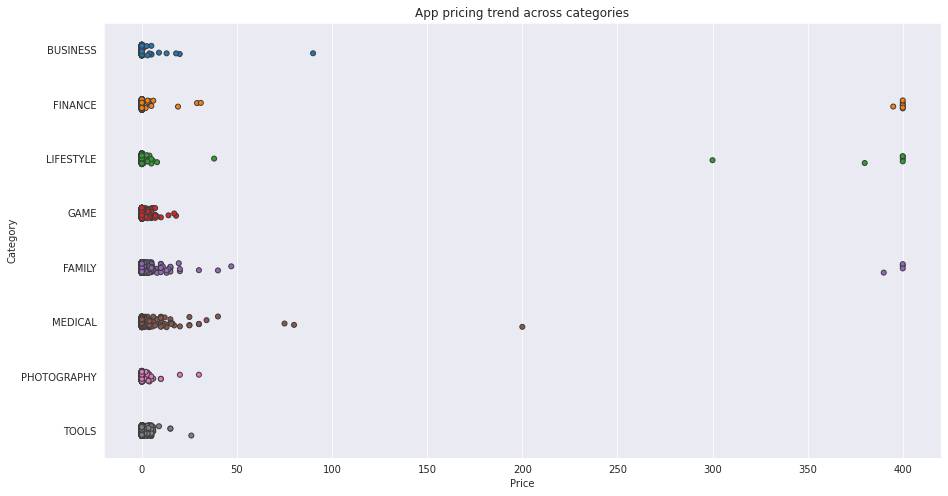

In [44]:
#6. Size and price of an app

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

In [45]:
#7. Relation between app category and app price
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]


In [46]:
#8. Filter out "junk" apps
import plotly; 

import plotly.graph_objects as go

trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

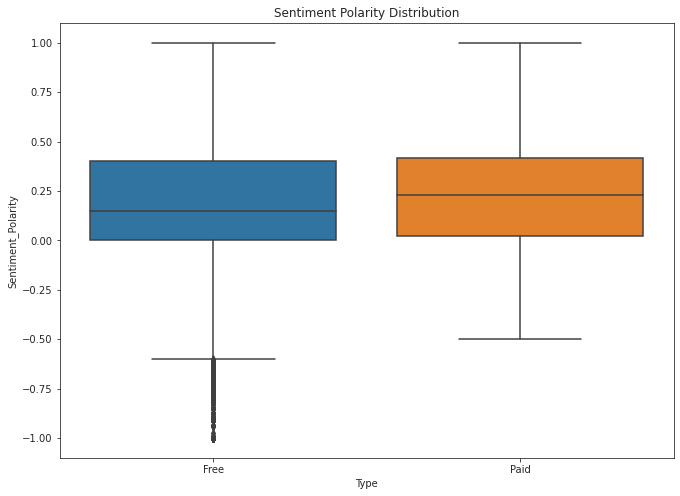

In [47]:
#9. Popularity of paid apps vs free apps

# Load user_reviews.csv
reviews_df = pd.read_csv('/content/user_reviews.csv', error_bad_lines= False)

# Join the two dataframes
merged_df = pd.merge(apps, reviews_df, on = "App")

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')